In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data)
clinical_trial = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
drug_data = mouse_data.join(clinical_trial.set_index('Mouse ID'), on='Mouse ID')

# Display the data table for preview
drug_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
0,f234,Stelasyn,5,47.313491,0
0,f234,Stelasyn,10,47.904324,0
0,f234,Stelasyn,15,48.735197,1
0,f234,Stelasyn,20,51.112713,2


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
Drug_Agg = drug_data.groupby(['Drug', 'Timepoint']).mean()
Drug_Agg.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
Drug_SE_Agg = drug_data.groupby(['Drug', 'Timepoint']).sem()
Drug_SE_Agg = Drug_SE_Agg.drop(columns='Mouse ID')
Drug_SE_Agg = Drug_SE_Agg.rename(columns={"Tumor Volume (mm3)": "Tumor Volume SE", 
                                          "Metastatic Sites": "Metastatic Sites SE"})
Drug_SE_Agg = Drug_SE_Agg[['Tumor Volume SE', 'Metastatic Sites SE']]
Drug_Agg = pd.merge(Drug_Agg, Drug_SE_Agg,  
                    how='right', 
                    left_on=['Drug','Timepoint'], 
                    right_on = ['Drug','Timepoint'])
Drug_Agg.head(20)

Tumor Volume (mm3)  Metastatic Sites  Tumor Volume SE  \
Drug      Timepoint                                                          
Capomulin 0                   45.000000          0.000000         0.000000   
          5                   44.266086          0.160000         0.448593   
          10                  43.084291          0.320000         0.702684   
          15                  42.064317          0.375000         0.838617   
          20                  40.716325          0.652174         0.909731   
          25                  39.939528          0.818182         0.881642   
          30                  38.769339          1.090909         0.934460   
          35                  37.816839          1.181818         1.052241   
          40                  36.958001          1.380952         1.223608   
          45                  36.236114          1.476190         1.223977   
Ceftamin  0                   45.000000          0.000000         0.000000   
          5                   46.503051          0.380952         0.164505   
          10                  48.285125          0.600000         0.236144   
          15                  50.094055          0.789474         0.332053   
          20                  52.157049          1.111111         0.359482   
          25                  54.287674          1.500000         0.439356   
          30                  56.769517          1.937500         0.490620   
          35                  58.827548          2.071429         0.692248   
          40                  61.467895          2.357143         0.708505   
          45                  64.132421          2.692308         0.902358   

                     Metastatic Sites SE  
Drug      Timepoint                       
Capomulin 0                     0.000000  
          5                     0.074833  
          10                    0.125433  
          15                    0.132048  
          20                    0.161621  
          25                    0.181818  
          30                    0.172944  
          35                    0.169496  
          40                    0.175610  
          45                    0.202591  
Ceftamin  0                     0.000000  
          5                     0.108588  
          10                    0.152177  
          15                    0.180625  
          20                    0.241034  
          25                    0.258831  
          30                    0.249479  
          35                    0.266526  
          40                    0.289128  
          45                    0.286101

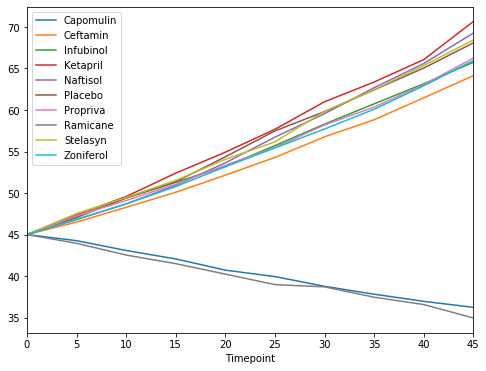

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
for Drug, Timepoint in Drug_Agg.groupby(level=0):
    #print(Timepoint['Tumor Volume (mm3)'].loc[Drug,:])
    Timepoint['Tumor Volume (mm3)'].loc[Drug,:].plot(kind="line", ax=ax, label=Drug)
plt.legend()

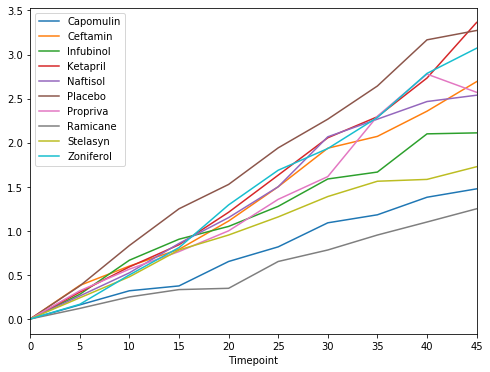

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
for Drug, Timepoint in Drug_Agg.groupby(level=0):
    #print(Timepoint['Tumor Volume (mm3)'].loc[Drug,:])
    Timepoint['Metastatic Sites'].loc[Drug,:].plot(kind="line", ax=ax, label=Drug)
plt.legend()

In [6]:
# Store the Count of Mice Grouped by Drug and Timepoint
survival_count = drug_data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})

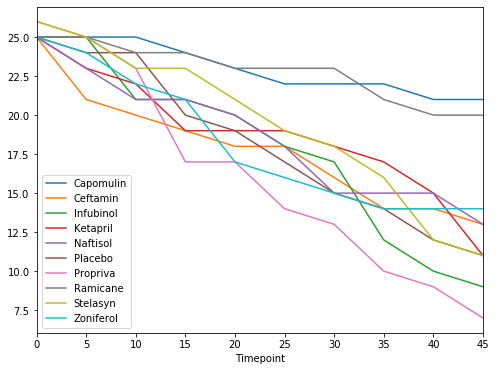

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
for Drug, Timepoint in survival_count.groupby(level=0):
    #print(Timepoint['Tumor Volume (mm3)'].loc[Drug,:])
    Timepoint['Mouse Count'].loc[Drug,:].plot(kind="line", ax=ax, label=Drug)
plt.legend()

In [11]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vols_mean = drug_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_vols_mean = pd.DataFrame(tumor_vols_mean)
 # Minor Data Munging to Re-Format the Data Frames
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

In [15]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (tumor_vols_pivot_mean.iloc[-1] - tumor_vols_pivot_mean.iloc[0]) / tumor_vols_pivot_mean.iloc[0]
# Display the data to confirm
Tumor_Change = pd.DataFrame({"Tumor Percentage Change": tumor_pct_change})
Tumor_Change

,Tumor Percentage Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


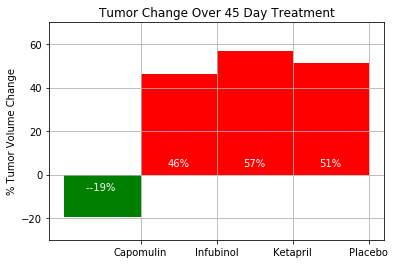

In [24]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"], 
               tumor_pct_change["Infubinol"], 
               tumor_pct_change["Ketapril"], 
               tumor_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Show the Figure
fig.show()